# The Least Squares Method
This linear model minimizes the sum of the error squared over the whole data set and is a very popular method for linear regression. Let's recall that a Gaussian function follows the form $$f(x)=Ae^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [9]:
from scipy.optimize import curve_fit
import scipy as scipy
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table
import pandas as pd
from numpy import exp, linspace, random

In [10]:
def gaussian(x, A, mu, sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

In [11]:
hdulist = fits.open('../data/composite_Io_eclipsed.fits')
evt_data = Table(hdulist[1].data)
image_data = hdulist[1].data
df = pd.read_csv('../data/Io_Master_Line_List (1).csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength = df['Wavelength']
df_species = df['Species']
wl = evt_data['WAVELENGTH'].data
flux = evt_data['FLUX'].data
wl = wl.T
flux = flux.T
wl = wl.ravel()
flux = flux.ravel()
wavelength_list = df_wavelength.values.tolist()
wavelength_array = np.array(wavelength_list)

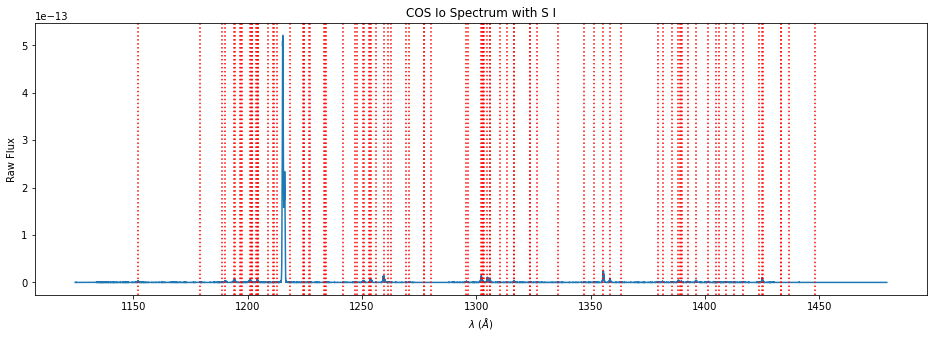

In [21]:
plt.figure(figsize=(16, 5))
plt.plot(evt_data['WAVELENGTH'].T, evt_data['FLUX'].T) #make it columns instead of rows bc otherwise will be a blank plot
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.title("COS Io Spectrum with S I")
#plt.ylim(-0.01*10**-13,0.25*10**-13)
for xc in df_wavelength:
    plt.axvline(x=xc, color = 'red', linestyle = 'dotted')

Define the line or give it a list

In [196]:
line = 1389.154
left_bound = 0.999*line
right_bound = 1.001*line
sub_region = (evt_data['WAVELENGTH'] > left_bound) & (evt_data['WAVELENGTH'] < right_bound) #only take values within this area
wl = evt_data['WAVELENGTH'][sub_region]
flux = evt_data['FLUX'][sub_region]
unc = 0.1*flux #placeholder uncertainty
wl_array = wl.data
flux_array = flux.data/10**-13

In [197]:
def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((wl_array-cen1)/sigma1)**2)))

In [198]:
amp1 = 0.5
sigma1 = 0.5
cen1 = line

In [214]:
popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, wl_array, flux_array, p0=[amp1, cen1, sigma1], 
                                                  bounds=([-np.inf,line*0.9998,-np.inf],[np.inf,line*1.0002,np.inf]))

perr_gauss = np.sqrt(np.diag(pcov_gauss))

In [215]:
a = popt_gauss[0]
a_err = perr_gauss[0]
mu = popt_gauss[1]
mu_err = perr_gauss[1]
w = popt_gauss[2]
w_err = perr_gauss[2]

In [216]:
print("\ngiven line is = {} ".format(line))
print("amplitude = {} (+/-) {}".format("{:e}".format(a), "{:e}".format(a_err)))
print("mu = {} (+/-) {}".format(mu, "{:e}".format(mu_err)))
print("sigma = {} (+/-) {}".format((w), "{:e}".format(w_err)))


given line is = 1389.154 
amplitude = 3.978700e-02 (+/-) 2.378243e-03
mu = 1388.8761692000003 (+/-) 5.400532e-02
sigma = 0.8575564878222534 (+/-) 6.527318e-02


In [217]:
print("\ngiven line is = {} ".format(line))
print("amplitude = {} (+/-) {}".format("{:e}".format(a), "{:e}".format(a_err)))
print("mu = {} (+/-) {}".format(mu, "{:e}".format(mu_err)))
print("sigma = {} (+/-) {}".format((w), "{:e}".format(w_err)))


given line is = 1389.154 
amplitude = 3.978700e-02 (+/-) 2.378243e-03
mu = 1388.8761692000003 (+/-) 5.400532e-02
sigma = 0.8575564878222534 (+/-) 6.527318e-02


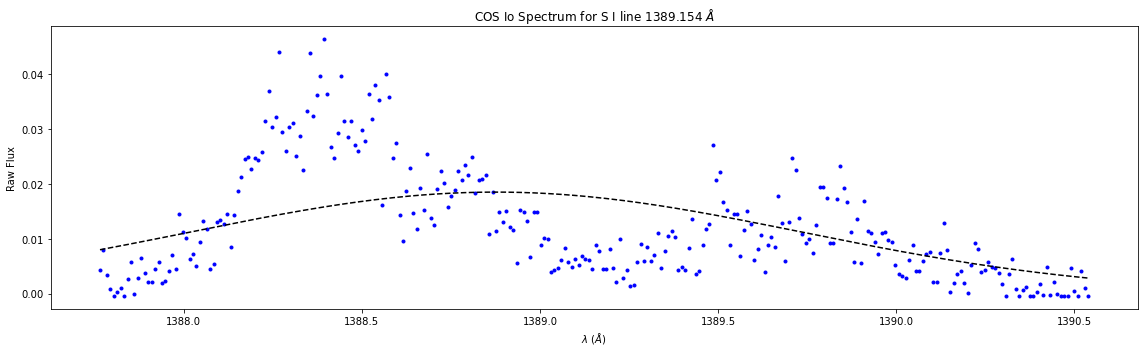

In [218]:
plt.figure(figsize=(16, 5))
plt.plot(wl_array,flux_array,'b.') #flux divided by 10**-13
#plt.ylim(-1*10**-15,1*10**-15)
plt.plot(wl_array, _1gaussian(wl_array, *popt_gauss), 'k--')#,\
#plt.plot(wl_array, _1gaussian(wl_array, 0.5*10**-14, line, 0.01), 'r--')#,\
#label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.title("COS Io Spectrum for S I line {} $\AA$".format(line))
plt.tight_layout()
save_place = '/Users/jojoa/GitHub/io_brightness/data/figures/'
#plt.savefig(save_place+"gauss_fit_{}.jpg".format(line), format="jpg",dpi=1000)